In [14]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import scipy as sp
import pandas as pd

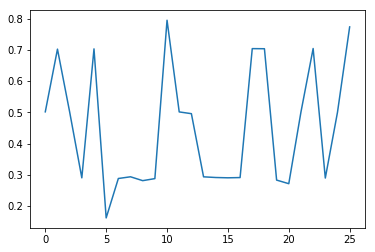

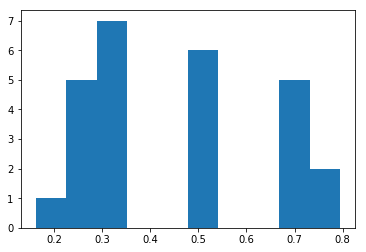

In [53]:
# ####### this for test on calculation correlation between environment and interaction matrices for all proteins

# import os

# path = '/home/maximus/Documents/bcb/svca/code/svca/SVCA/examples/IMC_one_example/P1_SAy10x1_G1/results/'

# files = []
# # r=root, d=directories, f = files
# for r, d, f in os.walk(path):
#     for file in f:
#         if 'matrices.txt' in file:
#             files.append(os.path.join(r, file))

            
# correlations = []
# for j in range(len(prot_names)):
#     matrices = []
#     for i in range(4):

#         file = pd.read_csv(path + prot_names[j] + '_0_interactions'+str(i) +'_matrices.txt',sep=" ", header= None)
#     #     print(file.values[0][0])
#         matrices.append(file.values)
#     correlations.append(np.corrcoef(matrices[1].reshape(-1), matrices[2].reshape(-1))[0,1])
#     # posit = pd.read_csv('P1_SAy10x1_G1/positions.txt', sep=",", header=None)

# plt.plot(correlations)
# plt.show()
# plt.hist(correlations)
# plt.show()

In [3]:
# Functions in numpy

def distance_matrix(position):
    distance = np.zeros((position.shape[0], position.shape[0]), dtype = np.float64)
    for i in range(position.shape[0]):
        for j in range(position.shape[0]):
            distance[i][j] = (position[i][0] - position[j][0])**2 + (position[i][1] - position[j][1])**2
    return distance

def gower(k1, k2, k3, k4):
    g1= np.sum(k1)
    g2 = np.sum(k2)
    g3 = np.sum(k3)
    g4 = np.sum(k4)
    G = g1+g2+g3+g4
    return [g1, g2, g3, g4]
#     return g1*1./G, g2*1./G, g3*1./G, g4*1./G


def quantile_normalise_phenotype(phenotype):
    # take ranks and scale to uniform
    phenotype_order = pd.Series(phenotype).rank().astype(float)
    phenotype_order = phenotype_order.values
    phenotype_order /= (phenotype_order.max()+1.)

    # transform uniform to gaussian using probit
    mean = 0
    sigma = 1
    phenotype_norm = mean + 2.**0.5 * sigma * scipy.special.erfinv(2.*phenotype_order-1.)
    phenotype_norm = np.reshape(phenotype_norm, [len(phenotype_norm), 1])

    return phenotype_norm
    

In [48]:
# DATA LOADER
import pandas as pd

##### data

# expressions = pd.read_csv('expressions.txt',sep=" ").loc[0:1]
# expressions = expressions[expressions.columns[0:3]]
# posit = pd.read_csv('positions.txt', sep=",", header=None).loc[0:1]
# print(posit.shape)

expressions = pd.read_csv('P1_SAy10x1_G1/expressions.txt',sep=" ")
posit = pd.read_csv('P1_SAy10x1_G1/positions.txt', sep=",", header=None)

pos1 = distance_matrix(posit.values)

In [47]:
y1 = expressions['CD20'].values
z1 = quantile_normalise_phenotype(y1)
y1 = z1.reshape(y1.shape[0],1)

x1 = expressions.drop(columns=['CD20']).values


all_x = np.zeros((x1.shape[0], x1.shape[1]))
all_y = np.zeros((y1.shape[0], y1.shape[1]))


prot_names = list(expressions.columns)
for i in range(len(prot_names)):
    y1 = expressions[prot_names[i]].values
    z1 = quantile_normalise_phenotype(y1)
    y1 = z1.reshape(y1.shape[0],1)
    x1 = expressions.drop(columns=[prot_names[i]]).values
#     print(x1.shape, all_y.shape)
    all_y = np.append(all_y, y1, axis=0)
    all_x = np.append(all_x, x1, axis=0)
    
all_x = all_x.reshape((27,x1.shape[0], x1.shape[1]))[1:, :, :]
all_y = all_y.reshape((27,y1.shape[0], y1.shape[1]))[1:, :, :]



NameError: name 'quantile_normalise_phenotype' is not defined

In [6]:
# in init did this
#             self.Kin *= covar_rescaling_factor_efficient(self.Kin)
# after this made intrinsic (doing nothing but made scale = 1.)
# set the lenth for interaction to 15.
# for each cov matrix do 
#      for cov in used_covar:
#             k = covar_rescaling_factor_efficient(cov.K())/n
#             # TODO: not so clean, would be good to have setInterParams ?   ### TODO: ehsan: cov.getInterParams() : cov.scale
#             new_params = np.log(cov.getInterParams() * k)
#             cov.setParams(new_params)

def covar_rescaling_factor_efficient(C):
    """
    Returns the rescaling factor for the Gower normalizion on covariance matrix C
    the rescaled covariance matrix has sample variance of 1
    """
    n = tf.shape(C)[0]
#     n = C.shape[0]
    P = tf.eye(n, dtype=tf.float64) - tf.math.divide(tf.ones((n,n), dtype=tf.float64), tf.cast(n, tf.float64))
#     P = sp.eye(n) - sp.ones((n,n))/float(n)
    CP = C - tf.reduce_mean(C,0)
#     CP = C - C.mean(0)[:, sp.newaxis]
    trPCP = tf.math.reduce_sum(tf.matmul(P, tf.transpose(CP)))
#     trPCP = sp.sum(P * CP)
    r = tf.cast(n-1, tf.float۶۴) / trPCP
#     r = (n-1) / trPCP
    return r



def covar_rescaling_factor(C):
    """
    Returns the rescaling factor for the Gower normalizion on covariance matrix C
    the rescaled covariance matrix has sample variance of 1
    """
    n = C.shape[0]
    P = sp.eye(n) - sp.ones((n,n))/float(n)
    trPCP = sp.trace(sp.dot(P,sp.dot(C,P)))
    r = (n-1) / trPCP
    return r
########
#         for cov in used_covar:
#             k = covar_rescaling_factor_efficient(cov.K())/n
#             # TODO: not so clean, would be good to have setInterParams ?   ### TODO: ehsan: cov.getInterParams() : cov.scale
#             new_params = np.log(cov.getInterParams() * k)
#             cov.setParams(new_params)
            
# def covar_rescaling_factor(C):
#     """
#     Returns the rescaling factor for the Gower normalizion on covariance matrix C
#     the rescaled covariance matrix has sample variance of 1
#     """
#     n = tf.shape(C)[0]
# #     n = C.shape[0]
#     P = tf.eye(n, dtype=tf.float32) - tf.math.divide(tf.ones((n,n), dtype=tf.float32), tf.cast(n, tf.float32))
# #     P = sp.eye(n) - sp.ones((n,n))/float(n)
# #     trPCP = sp.trace(sp.dot(P,sp.dot(C,P)))         ##### this line is also vulnerable
#     r = tf.cast(n-1, tf.float32) / trPCP
# #     r = (n-1) / trPCP
# #     return r
    
# #     n = C.shape[0]
    
# #     P = sp.eye(n) - sp.ones((n,n))/float(n)
# #     CP = C - tf.reduce_mean(C,0)
# #     CP = C - C.mean(0)[:, sp.newaxis]
#     trPCP = tf.math.reduce_sum(tf.matmul(P, tf.transpose(CP)))
# #     trPCP = sp.sum(P * CP)
# #     r = (n-1) / trPCP
#     return r

In [7]:
ix = tf.placeholder(shape=[None, None], dtype=tf.float64, name="x")
y = tf.placeholder(shape=[None, 1], dtype=tf.float64, name="y")
possition = tf.placeholder(shape=[None,None], dtype=tf.float64, name="position")

lr = tf.placeholder(shape=[], dtype=tf.float64, name='lr')

cov_norm1 = tf.placeholder(shape=[], dtype=tf.float64, name="cn1")
cov_norm2 = tf.placeholder(shape=[], dtype=tf.float64, name="cn2")
cov_norm3 = tf.placeholder(shape=[], dtype=tf.float64, name="cn3")
cov_norm4 = tf.placeholder(shape=[], dtype=tf.float64, name="cn4")

sig1 = tf.Variable(1, dtype=tf.float64, name="sig1")
sig2 = tf.Variable(1, dtype=tf.float64, name="sig2")
sig3 = tf.Variable(1, dtype=tf.float64, name="sig3")
sig4 = tf.Variable(1, dtype=tf.float64, name="sig4")

# 35.70588798, 10.10000213, 25.47430786,  2.76115028, 49.2300355
### cov_matrix1 sigma* matrix      xxxxxxxxxxxxxxxxxxxxxx
x = ix - tf.reduce_mean(ix,0)
# x = ix
xxt_befor_rescale = tf.matmul(x, tf.transpose(x))

# n = tf.shape(xxt_befor_rescale)[0] 
# P = tf.eye(n, dtype=tf.float32) - tf.math.divide(tf.ones((n,n), dtype=tf.float32), tf.cast(n, tf.float32))
# CP = xxt_befor_rescale - tf.reduce_mean(xxt_befor_rescale,0)
# trPCP = tf.math.reduce_sum(tf.matmul(P, tf.transpose(CP)))
# r =  tf.cast(n-1, tf.float32) / trPCP
# xxt = covar_rescaling_factor_efficient(xxt_befor_rescale) * xxt_befor_rescale
xxt = xxt_befor_rescale
# xxt = r * xxt_befor_rescale

sig1_pow2 = tf.pow(sig1, 2)

cov_matrix1 = sig1_pow2 * xxt


### cov_matrix2 sigma* matrix
def env_pos(x):
    return tf.exp(((-1)*(0.5)*x)/(tf.pow(l,2)))


l = tf.Variable(49.2300355, dtype=tf.float64, name="l")

zzt = tf.map_fn(env_pos, possition)

sig2_pow2 = tf.pow(sig2, 2)

cov_matrix2 = sig2_pow2 * zzt 


### cov_matrix3 sigma* matrix
u = tf.ones_like(xxt)
v = tf.eye(tf.shape(xxt)[0])
mask = tf.cast(u, dtype=tf.float64) - tf.cast(v, dtype=tf.float64)
weight = tf.math.multiply(mask, zzt)
zx = tf.matmul(weight, x)
zxxzt = tf.matmul(zx, tf.transpose(zx))
sig3_pow2 = tf.pow(sig3, 2)

cov_matrix3 = sig3_pow2 * zxxzt 


### cov_matrix4 sigma* matrix
noise__ = tf.eye(tf.shape(xxt)[0])
noise = tf.cast(noise__, dtype=tf.float64)
sig4_pow2 = tf.pow(sig4, 2)

cov_matrix4 = sig4_pow2 * noise


###### main covariance matrix
cov_matrix = cov_matrix1 / cov_norm1 + cov_matrix2 / cov_norm2 + cov_matrix3 / cov_norm3 + cov_matrix4 / cov_norm4
# cov_matrix =  cov_matrix1 / cov_norm1

# cov_matrix = cov_matrix1 + cov_matrix2 + cov_matrix3 + cov_matrix4
### cov_matrix = cov_matrix / tf.reduce_sum(cov_matrix)
# cov_matrix = tf.math.divide(cov_matrix, tf.reduce_sum(cov_matrix))


##### log likelihood term1
# cov_det = tf.linalg.det(cov_matrix)
cov_inv = tf.linalg.inv(cov_matrix)
loss_term1 = tf.matmul(tf.matmul(tf.transpose(y), cov_inv), y)

##### log likelihood term2
# loss_term2 = tf.log(cov_det)
loss_term2 = tf.linalg.logdet(cov_matrix)

#### loss function :log likelihood without constant vairable n/2log(pi)
loglikelihood = tf.add(loss_term1, loss_term2)
loss = 0.5*loglikelihood

### optimizer
optimizer = tf.train.AdamOptimizer(learning_rate= lr).minimize(loss)

In [8]:
all_x.shape

(26, 690, 25)

In [9]:
nx = all_x[0]
mnx = nx - np.mean(nx, axis=0)
nxxt = np.matmul(mnx, mnx.T)
np.sum(np.abs(nxxt))
np.sum(nxxt)


7.460698725481052e-14

In [10]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())
j=0
out, = sess.run([xxt], feed_dict= {ix:all_x[j], y:all_y[j], possition: pos1})
print(np.sum(out))
print(np.sum(nxxt))
print(np.max(np.abs(out - nxxt)))

2.4513724383723456e-13
7.460698725481052e-14
3.552713678800501e-15


In [11]:
# TRAINING

# posit
import time
epochs = 100
Ls = []
prot_loss = []
times = []
epochs_list = []
signatures = []
gowers = []
threshold = 0.0001
learning_rate=0.1

# loss_0 = all_y[0].shape[0]
# loss_0 *= 0.5
# loss_0 *= np.log(2*np.pi)
loss_0 = 0

with tf.Session() as sess:
    for j in range(all_x.shape[0]):
#     for j in range(0, 1):
        
        sess.run(tf.global_variables_initializer())
#         norm1, norm2, norm3, norm4 = sess.run([tf.reduce_sum(cov_matrix1 / sig1_pow2),
#                                                tf.reduce_sum(cov_matrix2 / sig2_pow2),
#                                                tf.reduce_sum(cov_matrix3 / sig3_pow2),
#                                                tf.reduce_sum(cov_matrix4 / sig4_pow2)], 
#                                              feed_dict= {ix:all_x[j], y:all_y[j], possition: pos1})
        
#         norm1, norm2, norm3, norm4 = sess.run([covar_rescaling_factor_efficient(cov_matrix1 / sig1_pow2),
#                                                covar_rescaling_factor_efficient(cov_matrix2 / sig2_pow2),
#                                                covar_rescaling_factor_efficient(cov_matrix3 / sig3_pow2),
#                                                covar_rescaling_factor_efficient(cov_matrix4 / sig4_pow2)], 
#                                              feed_dict= {ix:all_x[j], y:all_y[j], possition: pos1})
#         print(norm1)
#         print(norm2)
#         print(norm3)
#         print(norm4)
        
        norm1, norm2, norm3, norm4 = (1., 1., 1., 1.)
        
        i = 0
        s1_opt, s2_opt, s3_opt, s4_opt, l_opt = (0, 0, 0, 0, 0)
        cm1_opt, cm2_opt, cm3_opt, cm4_opt = (0, 0, 0, 0)
        min_loss_ever = np.float('inf')
        
        last_loss = -np.inf
        new_loss = np.inf
        
        loss_list = []
        t0 = time.time()
        a, b, c, d, lt = 0.0, 0.0, 0.0, 0.0, 0.0
        while(abs(last_loss-new_loss)>threshold) and (i < epochs):
#             cm1, cm2, cm3, cm4 = sess.run(
#                 [cov_matrix1, cov_matrix2, cov_matrix3, cov_matrix4], 
#                 feed_dict= {ix:all_x[j], y:all_y[j], possition: pos1, lr:learning_rate, 
#                            cov_norm1: norm1, cov_norm2: norm2, cov_norm3: norm3, cov_norm4: norm4})

            cm1, cm2, cm3, cm4, a, b, c, d,lt, opt, los = sess.run(
                [cov_matrix1, cov_matrix2, cov_matrix3, cov_matrix4, sig1, sig2, sig3, sig4,l,  optimizer, loss], 
                feed_dict= {ix:all_x[j], y:all_y[j], possition: pos1, lr:learning_rate, 
                           cov_norm1: norm1, cov_norm2: norm2, cov_norm3: norm3, cov_norm4: norm4})

            los = los[0]
            loss_list.append(los)
            i += 1
            last_loss = new_loss
            new_loss = los
            
            if min_loss_ever > los:
                min_loss_ever = los
                s1_opt, s2_opt, s3_opt, s4_opt, l_opt = (a, b, c, d, lt)
                cm1_opt, cm2_opt, cm3_opt, cm4_opt = (cm1, cm2, cm3, cm4)

        print(np.sum(np.abs(cm1_opt)))
        print(np.sum(np.abs(cm2_opt)))
        print(np.sum(np.abs(cm3_opt)))
        print(np.sum(np.abs(cm4_opt)))
        prot_loss.append(min_loss_ever + loss_0)
#         signatures.append([s1_opt, s2_opt, s3_opt, s4_opt])
        signatures.append([1./covar_rescaling_factor(cm1_opt), 1./ covar_rescaling_factor(cm2_opt), 1./ covar_rescaling_factor(cm3_opt), 1./ covar_rescaling_factor(cm4_opt)])
        Ls.append(l_opt)
        
#         epochs_list.append(i-1)
        t1 = time.time()
        times.append(t1-t0)
#         gowers.append(covar_rescaling_factor(cm1_opt, cm2_opt, cm3_opt, cm4_opt))
        
        s1_opt /= math.sqrt(norm1)
        s2_opt /= math.sqrt(norm2)
        s3_opt /= math.sqrt(norm3)
        s4_opt /= math.sqrt(norm4)
        
        # loading opt conds!
        sess.run([tf.assign(sig1, s1_opt), tf.assign(sig2, s2_opt), tf.assign(sig3, s3_opt), tf.assign(sig4, s4_opt), tf.assign(l, l_opt)])

#         print("sig1 is: ", s1_opt, "sig2 is: ", s2_opt, "sig3 is: ", s3_opt, "sig4 is: ", s4_opt, "The L is: ", l_opt, "Loss is: ", min_loss_ever)
        print("sig1 is: ", signatures[-1][0], "sig2 is: ", signatures[-1][1], "sig3 is: ", signatures[-1][2], "sig4 is: ", signatures[-1][3], "The L is: ", l_opt, "Loss is: ", min_loss_ever)
        print("time of calculation for ***",prot_names[j],"*** is: " ,t1-t0)
        print("--------------------------------------")

15164.676871451347
16563.34602409597
89360.5821427232
333.41014259757355
sig1 is:  0.12005617977743997 sig2 is:  0.4679338447077988 sig3 is:  0.461267398535826 sig4 is:  0.4832031052138737 The L is:  41.86727328969874 Loss is:  [172.85062764]
time of calculation for *** CD20 *** is:  31.87753915786743
--------------------------------------
9562.29152140772
12605.237527735384
31175.151432653754
432.83434053270054
sig1 is:  0.07566144276983001 sig2 is:  0.2914782319642207 sig3 is:  0.152560062285982 sig4 is:  0.6272961456995615 The L is:  46.68648571789386 Loss is:  [241.61627371]
time of calculation for *** CD3 *** is:  31.73559832572937
--------------------------------------
15074.281843260524
16609.04105358014
161454.3518101638
298.831144676142
sig1 is:  0.11789044812689076 sig2 is:  0.44368051082390425 sig3 is:  0.8232749137752524 sig4 is:  0.4330886154726689 The L is:  43.14827027271226 Loss is:  [152.58894048]
time of calculation for *** CD44 *** is:  29.685310125350952
-----------

67227.45686065273
218.4266197898202
5018.092281738012
247.63359704909436
sig1 is:  0.5278161062959583 sig2 is:  0.005789404917192448 sig3 is:  0.025406757355854785 sig4 is:  0.35888927108564345 The L is:  43.35612723139345 Loss is:  [33.60515487]
time of calculation for *** b-catenin *** is:  36.62488293647766
--------------------------------------
34127.84773398773
2742.835777335022
10199.926087607173
363.6966667965112
sig1 is:  0.26975676546675365 sig2 is:  0.05647198438690693 sig3 is:  0.04863853430184886 sig4 is:  0.527096618545663 The L is:  49.72109117461445 Loss is:  [160.63005222]
time of calculation for *** c-Myc *** is:  33.73793363571167
--------------------------------------


In [81]:
gowers[0]

[6.67572e-06, 1917.8594, 115.95787, 371.30194]

In [48]:
import os

path = 'P1_SAy10x1_G1/results/'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))
            
            
real_signs = []
for i in range(len(prot_names)):
    file = pd.read_csv(path + prot_names[i]+ '_0_interactions_effects.txt',sep=" ")
    real_signs.append(file.values[0].tolist())
# posit = pd.read_csv('P1_SAy10x1_G1/positions.txt', sep=",", header=None)

In [28]:
import os

path = 'our_results/'

for i in range(len(prot_names)):
    file.iloc[0][0] = gowers[i][0]
    file.iloc[0][1] = gowers[i][1]
    file.iloc[0][2] = gowers[i][2]
    file.iloc[0][3] = gowers[i][3]
    

IndexError: list index out of range

In [30]:
file = pd.read_csv(path + prot_names[0]+ '_0_interactions_Ls.txt',sep=" ", header=None)[0][0]


FileNotFoundError: [Errno 2] File b'our_results/CD20_0_interactions_Ls.txt' does not exist: b'our_results/CD20_0_interactions_Ls.txt'

In [76]:
# file.values[0][0]
real_L[-1]

29.175865127593003

In [74]:
# CHECKING LOSS GIVEN SIGMAS
real_L = []
real_losses = []
# for i in range(len(prot_names)):
for i in range(1):
    file = pd.read_csv(path + prot_names[0]+ '_0_interactions_Ls.txt',sep=" ", header=None)[0][0]
    real_L.append(file)
    s1, s2, s3, s4 = np.sqrt(real_signs[i])
    lv = real_L[-1]
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    sess.run([tf.assign(sig1, s1), tf.assign(sig2, s2), tf.assign(sig3, s3), tf.assign(sig4, s4), tf.assign(l, lv)])
    t1 = time.time()
    the_loss = sess.run([loss], feed_dict= {ix:all_x[0], y:all_y[0], possition: pos1, cov_norm1:1, cov_norm2:1, cov_norm3:1, cov_norm4:1})
    t2 = time.time()
    ### adding normalization term to loss ##########
#     loss_0 = all_y[0].shape[0]
#     loss_0 *= 0.5
#     loss_0 *= np.log(2*np.pi)
#     the_loss += loss_0
    real_losses.append(the_loss)
    print('Loss: %.4f, (%.2f secs)' % (the_loss[0], t2 - t1))

Loss: 209.6409, (0.29 secs)


In [52]:
import os

path = '/home/maximus/Documents/bcb/svca/code/svca/SVCA/examples/IMC_one_example/P1_SAy10x1_G1/results/'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))
            
their_loss = []
for i in range(len(prot_names)):
    
    file = pd.read_csv(path + prot_names[i]+ '_0_interactions_lmls.txt',sep=" ", header= None)
#     print(file.values[0][0])
    their_loss.append(file.values[0][0])
# posit = pd.read_csv('P1_SAy10x1_G1/positions.txt', sep=",", header=None)




In [58]:
real_losses = np.array(real_losses)
real_losses111 = real_losses
prot_loss = np.array(prot_loss)
prot_loss1111 = prot_loss

real_losses = real_losses.reshape((prot_loss.shape))

In [69]:
prot_loss[0]*2

345.7012552829311

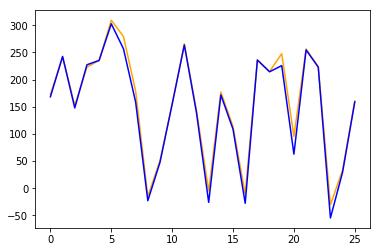

In [61]:

plt.plot(prot_loss.tolist() ,c='orange')
plt.plot(their_loss,c='blue')

In [63]:
real_sign1 = [real_signs[i][0] for i in range(len(real_signs))]
real_sign2 = [real_signs[i][1] for i in range(len(real_signs))]
real_sign3 = [real_signs[i][2] for i in range(len(real_signs))]
real_sign4 = [real_signs[i][3] for i in range(len(real_signs))]
our_sign1 =  [signatures[i][0] for i in range(len(signatures))]
our_sign2 =  [signatures[i][1] for i in range(len(signatures))]
our_sign3 =  [signatures[i][2] for i in range(len(signatures))]
our_sign4 =  [signatures[i][3] for i in range(len(signatures))]

In [44]:
prot_loss = prot_loss.reshape((26))
np.savetxt('prot_loss.txt', prot_loss)

In [46]:
our_sign3_save = np.array(our_sign3)
np.savetxt('our_sign3_save.txt', our_sign3_save)


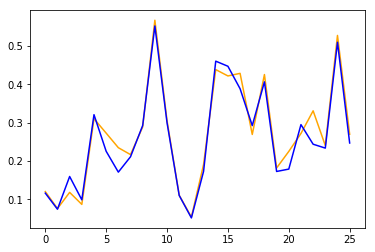

In [69]:
plt.plot(our_sign1 ,c='orange')
plt.plot(real_sign1,c='blue')

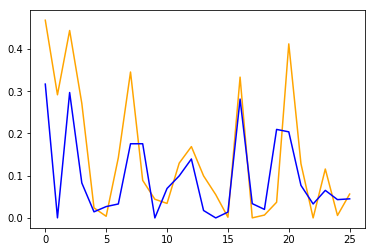

In [70]:
plt.plot(our_sign2 ,c='orange')
plt.plot(real_sign2,c='blue')

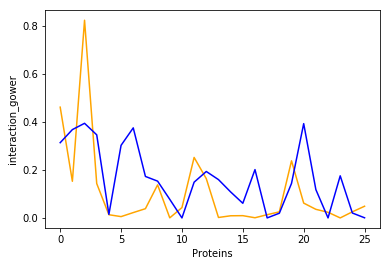

In [81]:
plt.plot(our_sign3 ,c='orange')
plt.plot(real_sign3,c='blue')
plt.xlabel("Proteins")
plt.ylabel("interaction_gower")
plt.show()

In [104]:
mat1 = cm1_opt.reshape(-1)
mat2 = cm2_opt.reshape(-1)
mat3 = cm3_opt.reshape(-1)

In [105]:
np.corrcoef(mat1, mat2)

array([[1.        , 0.12081023],
       [0.12081023, 1.        ]])

In [106]:
np.corrcoef(mat1, mat3)

array([[1.        , 0.15104898],
       [0.15104898, 1.        ]])

In [107]:
 np.corrcoef(mat2 ,mat3)

array([[1.        , 0.66264552],
       [0.66264552, 1.        ]])

In [108]:
corr = np.array((3,3))


In [86]:
r = np.array(real_sign2).reshape((-1))
r.shape

(26,)

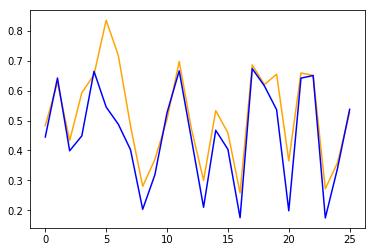

In [72]:
plt.plot(our_sign4 ,c='orange')
plt.plot(real_sign4,c='blue')

In [66]:
our_sign1[1]

0.07566144276983001

In [67]:
# CHECKING LOSS GIVEN SIGMAS
# s1, s2, s3, s4, lv = (real_sign1[1]*(-2.60465435), real_sign1[1]/(-7.34379681), real_sign1[1]/(-0.8675316) , real_sign1[1]/(-0.44300931), 59.58584629108587)
s1, s2, s3, s4, lv = (our_sign1[0], our_sign2[0], our_sign3[0] , our_sign4[0], Ls[0])

sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run([tf.assign(sig1, s1), tf.assign(sig2, s2), tf.assign(sig3, s3), tf.assign(sig4, s4), tf.assign(l, lv)])
t1 = time.time()
the_loss = sess.run([loss], feed_dict= {ix:all_x[0], y:all_y[0], possition: pos1, cov_norm1:1, cov_norm2:1, cov_norm3:1, cov_norm4:1})
t2 = time.time()

print('Loss: %.4f, (%.2f secs)' % (the_loss[0], t2 - t1))

Loss: 303.2734, (0.28 secs)


NameError: name 'our_sign4' is not defined

In [97]:
############################################### from log_likelihood
import numpy as np
import math
import pandas as pd
import scipy
from scipy import special


def quantile_normalise_phenotype(phenotype):
    # take ranks and scale to uniform
    phenotype_order = pd.Series(phenotype).rank().astype(float)
    phenotype_order = phenotype_order.values
    phenotype_order /= (phenotype_order.max()+1.)

    # transform uniform to gaussian using probit
    mean = 0
    sigma = 1
    phenotype_norm = mean + 2.**0.5 * sigma * scipy.special.erfinv(2.*phenotype_order-1.)
    phenotype_norm = np.reshape(phenotype_norm, [len(phenotype_norm), 1])

    return phenotype_norm

def making_kinships(pos, y, x, sigma1, sigma2, sigma3, sigma4, l):
    t1 = (sigma1**2)*making_intrinsic(x=x)
    t2 = making_environment(pos=pos, l=l)
    t3 = (sigma3**2)*making_cc_interaction(x=x, env=t2)
    t2 *= sigma2**2
    t4 = (sigma4**2)*making_noise(pos.shape[0])
    
    return t1+t2+t3+t4

def making_intrinsic(x):    
    return np.matmul(x,x.T)


def making_environment(pos, l):
    pos = pos.as_matrix()
    env = distance_matrix(pos)
    for i in range(pos.shape[0]):
        for j in range(pos.shape[0]):
            env[i][j] = np.exp((-0.5)*env[i][j]/(l**2))
            
    return env
            
def distance_matrix(position):
    distance = np.zeros((position.shape[0], position.shape[0]), dtype = np.float32)
    for i in range(position.shape[0]):
        for j in range(position.shape[0]):
            distance[i][j] = (position[i][0] - position[j][0])**2 + (position[i][1] - position[j][1])**2
            
    return distance

def making_cc_interaction(x, env):
    mask = np.ones_like(env) - np.eye(np.shape(env)[0])
    weight = np.multiply(mask, env)
    zx = np.matmul(weight, x)
    zxxz = np.matmul(zx, zx.T)
    
    return zxxz

def making_noise(n):
    return np.eye(n)

def loglikelihood(y, cov_matrix):
    cov_inv = np.linalg.inv(cov_matrix)
    loss_term1 = np.matmul(np.matmul(y.T, cov_inv), y)
    (sgn, loss_term2) = np.linalg.slogdet(cov_matrix)
    d = cov_matrix.shape[0]
    loss_term0 = d*math.log(2.*math.pi)
    return -0.5 * ( loss_term0+ loss_term1+ loss_term2)



######################################### data from log_likelihood ###################################


expressions = pd.read_csv('P1_SAy10x1_G1/expressions.txt',sep=" ")
posit = pd.read_csv('P1_SAy10x1_G1/positions.txt', sep=",", header=None)

# pos1 = distance_matrix(posit.values)


y1 = expressions['CD20'].values
z1 = quantile_normalise_phenotype(y1)
y1 = z1.reshape(y1.shape[0],1)

x1 = expressions.drop(columns=['CD20']).values


all_x = np.zeros((x1.shape[0], x1.shape[1]))
all_y = np.zeros((y1.shape[0], y1.shape[1]))


prot_names = list(expressions.columns)
for i in range(len(prot_names)):
    y1 = expressions[prot_names[i]].values
    z1 = quantile_normalise_phenotype(y1)
    y1 = z1.reshape(y1.shape[0],1)
    x1 = expressions.drop(columns=[prot_names[i]]).values
#     print(x1.shape, all_y.shape)
    all_y = np.append(all_y, y1, axis=0)
    all_x = np.append(all_x, x1, axis=0)
    
all_x = all_x.reshape((27,x1.shape[0], x1.shape[1]))[1:, :, :]
all_y = all_y.reshape((27,y1.shape[0], y1.shape[1]))[1:, :, :]





In [98]:
def fitness_tensor(signs):
    s1, s2, s3, s4 , lv = signs
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    sess.run([tf.assign(sig1, s1), tf.assign(sig2, s2), tf.assign(sig3, s3), tf.assign(sig4, s4), tf.assign(l, lv)])
    t1 = time.time()
    the_loss = sess.run([loss], feed_dict= {ix:all_x[0], y:all_y[0], possition: pos1, cov_norm1:1, cov_norm2:1, cov_norm3:1, cov_norm4:1})
    t2 = time.time()
    print('Loss: %.4f, (%.2f secs)' % (the_loss[0], t2 - t1))
    loss_0 = all_y[0].shape[0]
    loss_0 *= 0.5
    loss_0 *= np.log(2*np.pi)
    return 1./ (the_loss[0]+ loss_0)
    
    
def fitness(signs):
    k = making_kinships(pos=posit, y= all_y[0], x= all_x[0], sigma1=signs[0], sigma2=signs[1], sigma3=signs[2], sigma4=signs[3], l=signs[4])
    return -1./loglikelihood(all_y[0], k)

def normalize_probabilities(fitlist):
    h = np.array(fitlist)
    s = np.sum(h)
    normalized = [fitlist[i]/s for i in range(len(fitlist))]
    return normalized

def get_2_parent(probabilities):
    probabilities = probabilities.flatten()
    x = np.random.multinomial(1,probabilities,2)
    first = 0
    second = 0
    for i in range(x[0].shape[0]):
        if x[0][i] == 1:
            first = i
        if x[1][i] == 1:
            second = i
    return first, second

def crossover(first, second, signs, probabilities):
    first = signs[first]
    second = signs[second]
    p = probabilities[first]/(sum(probabilities[first], probabilities[second]))
    child1 = []
    child2 = []
    for i in range(first.shape[0]):
        j = np.random.binomial(1,p,1)[0]
        if j==1:
            child1.append(first[i])
            child2.append(second[i])
        else:
            child1.append(second[i])
            child2.append(first[i])
    return child1, child2

def mutation(sample_sign):
    p = 0.5
    mu , sigma = 0 , 1
    for i in range(sample_sign.shape[0]):
        if np.random.binomial(1, p, 1)[0] ==1:
            sample_sign[i] = sample_sign[i] + np.random.normal(mu, sigma, 1)[0]
    return sample_sign



In [113]:
import numpy as np
import time 

####
pop_size = 70 ## size of population
rng = 50 #### 0 to 100 is range of numbers of signatures
gen_num = 1 ##### number of generations
new_population =[]

maximum_likelihood = 0
max_signature = (0, 0, 0, 0, 0)



pop = [[np.random.uniform(0,rng,5)] for i in range(pop_size)]
pop = np.array(pop)
pop = pop.flatten()
pop = pop.reshape((pop_size,5))
fitnesses = []
for j in range(gen_num):
    for i in range(pop_size):
        try:
            fitnesses.append(fitness_tensor(pop[i]))
        except:
            print('cholesky')
    g = np.array(fitnesses)
    index = np.argmax(g)
    if g[index]> maximum_likelihood:
        maximum_likelihood = g[index]
        max_signature = pop[index]
    probabilities = normalize_probabilities(fitnesses)
#     print(pop)
    for i in range(int(pop_size/2)):
        c1,c2 = get_2_parent(probabilities)
        ch1, ch2 = crossover(ch1, ch2, signs=signs, probabilities=probabilities)
        child1 = mutation(ch1)
        child2 = mutation(ch2)
        new_population.append(child1)
        new_population.append(child2)
    pop = new_population

# z = [12,4,40,4,40]
# i = normalize_probabilities(z)
# get_2_parent(i)
# p = 0.33
# np.random.binomial(1, p, 1)[0]
# mu , sigma = 0 , 1
# np.random.normal(mu, sigma, 1)[0]

Loss: 2367.4248, (0.31 secs)
Loss: 2491.2954, (0.30 secs)
Loss: 1537.2662, (0.31 secs)
Loss: 2776.3794, (0.28 secs)
Loss: 2767.0054, (0.30 secs)
Loss: 2641.1855, (0.35 secs)
Loss: 2753.3225, (0.32 secs)
Loss: 2703.8091, (0.30 secs)
Loss: 2119.6035, (0.27 secs)
Loss: 2829.1687, (0.31 secs)
Loss: 2521.0950, (0.31 secs)
Loss: 1683.9873, (0.52 secs)
Loss: 2801.7664, (0.29 secs)
Loss: 2576.6926, (0.34 secs)
Loss: 1028.5024, (0.30 secs)
Loss: 1922.2677, (0.32 secs)
Loss: 1915.2365, (0.38 secs)
Loss: 2074.1624, (0.32 secs)
Loss: 2622.9612, (0.41 secs)
Loss: 2698.2942, (0.28 secs)
Loss: 2556.6294, (0.65 secs)
Loss: 2813.4792, (0.51 secs)
Loss: 2146.6108, (0.31 secs)
Loss: 2181.7363, (0.30 secs)
Loss: 2339.6121, (0.29 secs)
Loss: 2768.2751, (0.31 secs)
Loss: 2621.1013, (0.29 secs)
Loss: 2310.5156, (0.30 secs)
Loss: 1991.5375, (0.31 secs)
Loss: 2185.7957, (0.28 secs)
Loss: 2722.6643, (0.63 secs)
Loss: 1760.7762, (0.32 secs)
cholesky
Loss: 2547.6301, (0.32 secs)
Loss: 2755.7571, (0.30 secs)
Loss:

ValueError: object too deep for desired array

In [11]:
# TRAINING run for CD20 with GA

# posit
import time
epochs = 100
Ls = []
prot_loss = []
times = []
epochs_list = []
signatures = []
gowers = []
threshold = 0.0001
learning_rate=0.1

loss_0 = all_y[0].shape[0]
loss_0 *= 0.5
loss_0 *= np.log(2*np.pi)

with tf.Session() as sess:
#     for j in range(all_x.shape[0]):
    for j in range(0, 1):
        
        sess.run(tf.global_variables_initializer())
#         norm1, norm2, norm3, norm4 = sess.run([tf.reduce_sum(cov_matrix1 / sig1_pow2),
#                                                tf.reduce_sum(cov_matrix2 / sig2_pow2),
#                                                tf.reduce_sum(cov_matrix3 / sig3_pow2),
#                                                tf.reduce_sum(cov_matrix4 / sig4_pow2)], 
#                                              feed_dict= {ix:all_x[j], y:all_y[j], possition: pos1})
        
#         print(norm1)
#         print(norm2)
#         print(norm3)
#         print(norm4)
        
        norm1, norm2, norm3, norm4 = (1, 1, 1, 1)
        
        i = 0
        s1_opt, s2_opt, s3_opt, s4_opt, l_opt = (0, 0, 0, 0, 0)
        cm1_opt, cm2_opt, cm3_opt, cm4_opt = (0, 0, 0, 0)
        min_loss_ever = np.float('inf')
        
        last_loss = -np.inf
        new_loss = np.inf
        
        loss_list = []
        t0 = time.time()
        a, b, c, d, lt = 0.0, 0.0, 0.0, 0.0, 0.0
        while(abs(last_loss-new_loss)>threshold) and (i < epochs):
            cm1, cm2, cm3, cm4, a, b, c, d,lt, opt, los = sess.run(
                [cov_matrix1, cov_matrix2, cov_matrix3, cov_matrix4, sig1, sig2, sig3, sig4,l,  optimizer, loss], 
                feed_dict= {ix:all_x[j], y:all_y[j], possition: pos1, lr:learning_rate, 
                           cov_norm1: norm1, cov_norm2: norm2, cov_norm3: norm3, cov_norm4: norm4})
            los = los[0]
#             loss_list.append(los)
            i += 1
            last_loss = new_loss
            new_loss = los
            
            if min_loss_ever > los:
                min_loss_ever = los
                s1_opt, s2_opt, s3_opt, s4_opt, l_opt = (a, b, c, d, lt)
                cm1_opt, cm2_opt, cm3_opt, cm4_opt = (cm1, cm2, cm3, cm4)

            
        prot_loss.append(min_loss_ever + loss_0)
        signatures.append([s1_opt, s2_opt, s3_opt, s4_opt])
        Ls.append(l_opt)
        
#         epochs_list.append(i-1)
        t1 = time.time()
        times.append(t1-t0)
        gowers.append(gower(cm1_opt, cm2_opt, cm3_opt, cm4_opt))
        
        s1_opt /= math.sqrt(norm1)
        s2_opt /= math.sqrt(norm2)
        s3_opt /= math.sqrt(norm3)
        s4_opt /= math.sqrt(norm4)
        
        # loading opt conds!
        sess.run([tf.assign(sig1, s1_opt), tf.assign(sig2, s2_opt), tf.assign(sig3, s3_opt), tf.assign(sig4, s4_opt), tf.assign(l, l_opt)])

        print("sig1 is: ", s1_opt, "sig2 is: ", s2_opt, "sig3 is: ", s3_opt, "sig4 is: ", s4_opt, "The L is: ", l_opt, "Loss is: ", min_loss_ever)
        print("time of calculation for ***",prot_names[j],"*** is: " ,t1-t0)
        print("--------------------------------------")

InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid.
	 [[node logdet/Cholesky (defined at <ipython-input-6-f02e6a6d3241>:80)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](add_2)]]

Caused by op 'logdet/Cholesky', defined at:
  File "/home/maximus/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/maximus/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/maximus/miniconda3/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/home/maximus/miniconda3/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/home/maximus/miniconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-f02e6a6d3241>", line 80, in <module>
    loss_term2 = tf.linalg.logdet(cov_matrix)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tensorflow/python/ops/linalg/linalg_impl.py", line 87, in logdet
    chol = gen_linalg_ops.cholesky(matrix)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 709, in cholesky
    "Cholesky", input=input, name=name)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/maximus/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cholesky decomposition was not successful. The input might not be valid.
	 [[node logdet/Cholesky (defined at <ipython-input-6-f02e6a6d3241>:80)  = Cholesky[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](add_2)]]


In [119]:
max_signature

array([35.70588798, 10.10000213, 25.47430786,  2.76115028, 49.2300355 ])